#Pin classification with MLP 
Óscar Poblete Sáenz <br> Course: Introduction to Artificial Intelligence
<br> 
Teacher: Elizabeth Guevara Martinez<br>
Universidad Anáhuac <br> Note: Hu moments are used to obtain the characteristics of each of the 5 classes
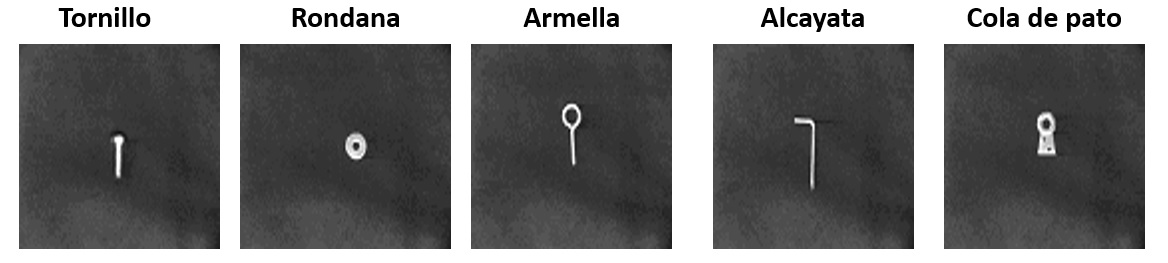

In [ ]:
# Import libraries
import numpy as np # Linear algebra
import pandas as pd # Data analysis and manipulation
import matplotlib.pyplot as plt # Graph
from sklearn.model_selection import train_test_split # Split data into train and test sets
from sklearn.preprocessing import StandardScaler # Preprocess and standardize data
from sklearn.neural_network import MLPClassifier # MLP, we could also use regression
from sklearn.metrics import confusion_matrix # Confusion matrix

In [ ]:
# Retrieve file data and display certain amount
data=pd.read_csv('pin_examples.csv')
data.head(20) 

,Hu1,Hu2,Clase
0,0.591545,0.306862,1
1,0.535357,0.246963,1
2,0.516339,0.229196,1
3,0.502906,0.215279,1
4,0.607214,0.324385,1
5,0.523718,0.235440,1
6,0.491724,0.207505,1
7,0.516101,0.230221,1
8,0.502150,0.216662,1
9,0.517849,0.230734,1


In [ ]:
x=data.iloc[:,:-1].values # Save Hu1 and Hu2, the colon is used to save all columns except the last one (output)
x

array([[5.91544810e-01, 3.06862140e-01],
       [5.35356900e-01, 2.46963470e-01],
       [5.16339100e-01, 2.29196210e-01],
       [5.02905500e-01, 2.15279360e-01],
       [6.07214410e-01, 3.24384790e-01],
       [5.23718410e-01, 2.35440320e-01],
       [4.91724460e-01, 2.07504780e-01],
       [5.16101420e-01, 2.30221380e-01],
       [5.02150170e-01, 2.16662010e-01],
       [5.17849290e-01, 2.30733720e-01],
       [1.97187450e-01, 1.43700000e-05],
       [1.97050920e-01, 5.56600000e-05],
       [1.92618550e-01, 4.42900000e-05],
       [1.92674220e-01, 3.36500000e-05],
       [1.93872350e-01, 1.81500000e-05],
       [1.95195030e-01, 3.21000000e-06],
       [1.96748450e-01, 4.20100000e-05],
       [1.96551250e-01, 5.24400000e-05],
       [1.95183150e-01, 3.27900000e-05],
       [1.95051300e-01, 2.28800000e-05],
       [7.98502520e-01, 3.67498200e-01],
       [8.21245180e-01, 3.95112260e-01],
       [8.02664850e-01, 3.82761650e-01],
       [8.64958050e-01, 4.42863410e-01],
       [7.637748

In [ ]:
y=data.iloc[:,-1].values # Save last column of every row
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

Text(0, 0.5, 'Hu2')

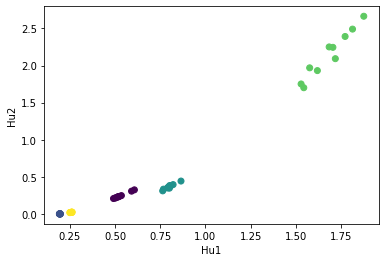

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y) # Graph both axes
labels=data.columns.values # Read and save the data from the csv columns in a variable
plt.xlabel(labels[0])
plt.ylabel(labels[1])

In [ ]:
# Standardize data, put them at the same level or ranges
x=StandardScaler().fit_transform(x)
x

array([[-0.18802549, -0.3039124 ],
       [-0.29158966, -0.37700262],
       [-0.3266428 , -0.39868278],
       [-0.35140328, -0.41566456],
       [-0.15914367, -0.28253071],
       [-0.31304144, -0.39106353],
       [-0.37201189, -0.42515134],
       [-0.32708088, -0.39743184],
       [-0.35279548, -0.4139774 ],
       [-0.32385925, -0.39680667],
       [-0.91489524, -0.6783376 ],
       [-0.91514689, -0.67828722],
       [-0.92331652, -0.67830109],
       [-0.92321391, -0.67831408],
       [-0.92100555, -0.67833299],
       [-0.91856762, -0.67835122],
       [-0.91570439, -0.67830388],
       [-0.91606787, -0.67829115],
       [-0.91858952, -0.67831513],
       [-0.91883254, -0.67832722],
       [ 0.19343385, -0.22992239],
       [ 0.23535256, -0.19622685],
       [ 0.20110576, -0.21129745],
       [ 0.31592304, -0.13795941],
       [ 0.12942463, -0.29915963],
       [ 0.19777512, -0.25482104],
       [ 0.13728824, -0.27102994],
       [ 0.17898513, -0.251296  ],
       [ 0.18199542,

In [ ]:
# Generate seed so that the data does not change and you have the same training and test data set
np.random.seed(1)

In [ ]:
# Split data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3) # Generally 70% is used for training and 30% for testing. Training data must not be the same as test data

# Define MLP
model=MLPClassifier(solver='lbfgs', max_iter=1000, hidden_layer_sizes=4)
# In the model we must establish the parameters and apply the stochastic gradient with the optimizer, the maximum number of iterations and the architecture
# 4 hidden layers were put because 4 lines are needed to separate the classes
# The lbfgs optimizer is used for small data sets, adam for large data sets (detects flats and slopes), and sgd for both.

# Train the model to find the weights that solve the problem
model.fit(x_train,y_train) 


MLPClassifier(hidden_layer_sizes=4, max_iter=1000, solver='lbfgs')

In [ ]:
# Evaluate the model
y_pred=model.predict(x_test)
y_pred

array([3, 4, 5, 4, 1, 1, 5, 3, 5, 4, 4, 4, 3, 4, 2])

In [ ]:
# Check accuracy (number of hits/total data)
score=model.score(x_test,y_test)
score

# If the score is 1.0 the system works 100%

1.0

In [ ]:
# Evaluate the behavior of the model and its results
confusionM=confusion_matrix(y_test,y_pred)
print(confusionM)
# Each row represents a class
# If a corner-to-corner diagonal is generated, the system works 100%
# The numbers represent the number of elements of each class. As well as the combinations between false and positive

[[2 0 0 0 0]
 [0 1 0 0 0]
 [0 0 3 0 0]
 [0 0 0 6 0]
 [0 0 0 0 3]]
